In [1]:
from read_data import *
from changepoint_detection import *

In [2]:
data = process_data()

In [3]:
selected_sensors = ["CH1_Moment", "CH2_Kraft"]

In [4]:
changepoints = generate_changepoints(data, selected_sensors)

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\ruptures\costs\costnormal.py:27: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


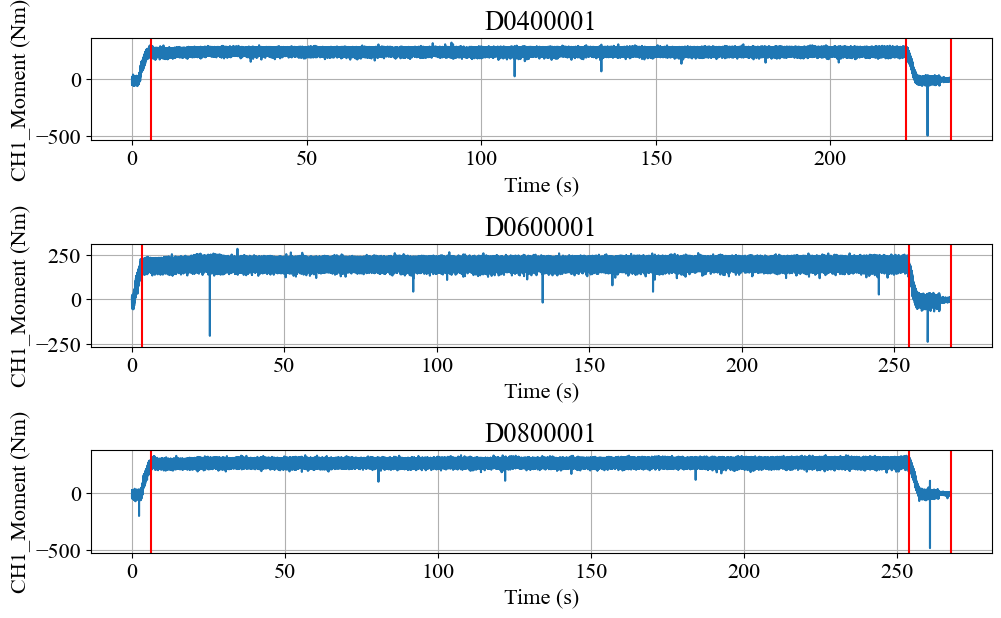

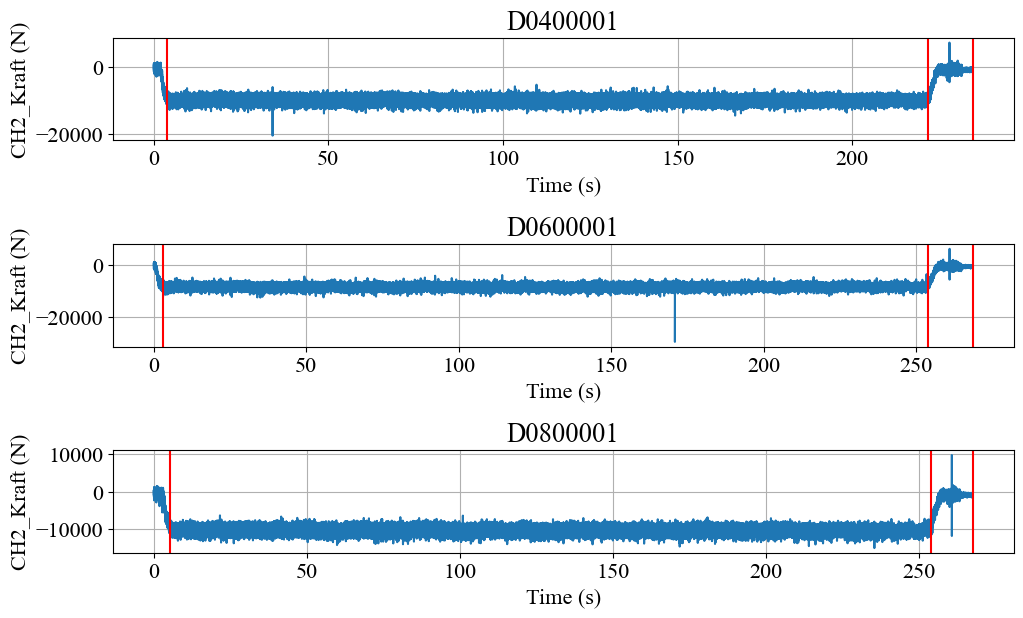

In [5]:
datasets = [
            'D0400001',
            'D0600001',
            'D0800001'
        ]

plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 6), "D_datasets_CH1_cpt.pdf")
plot_change_points_mult(datasets, data, changepoints, "CH2_Kraft", (10, 6), "D_datasets_CH2_cpt.pdf")

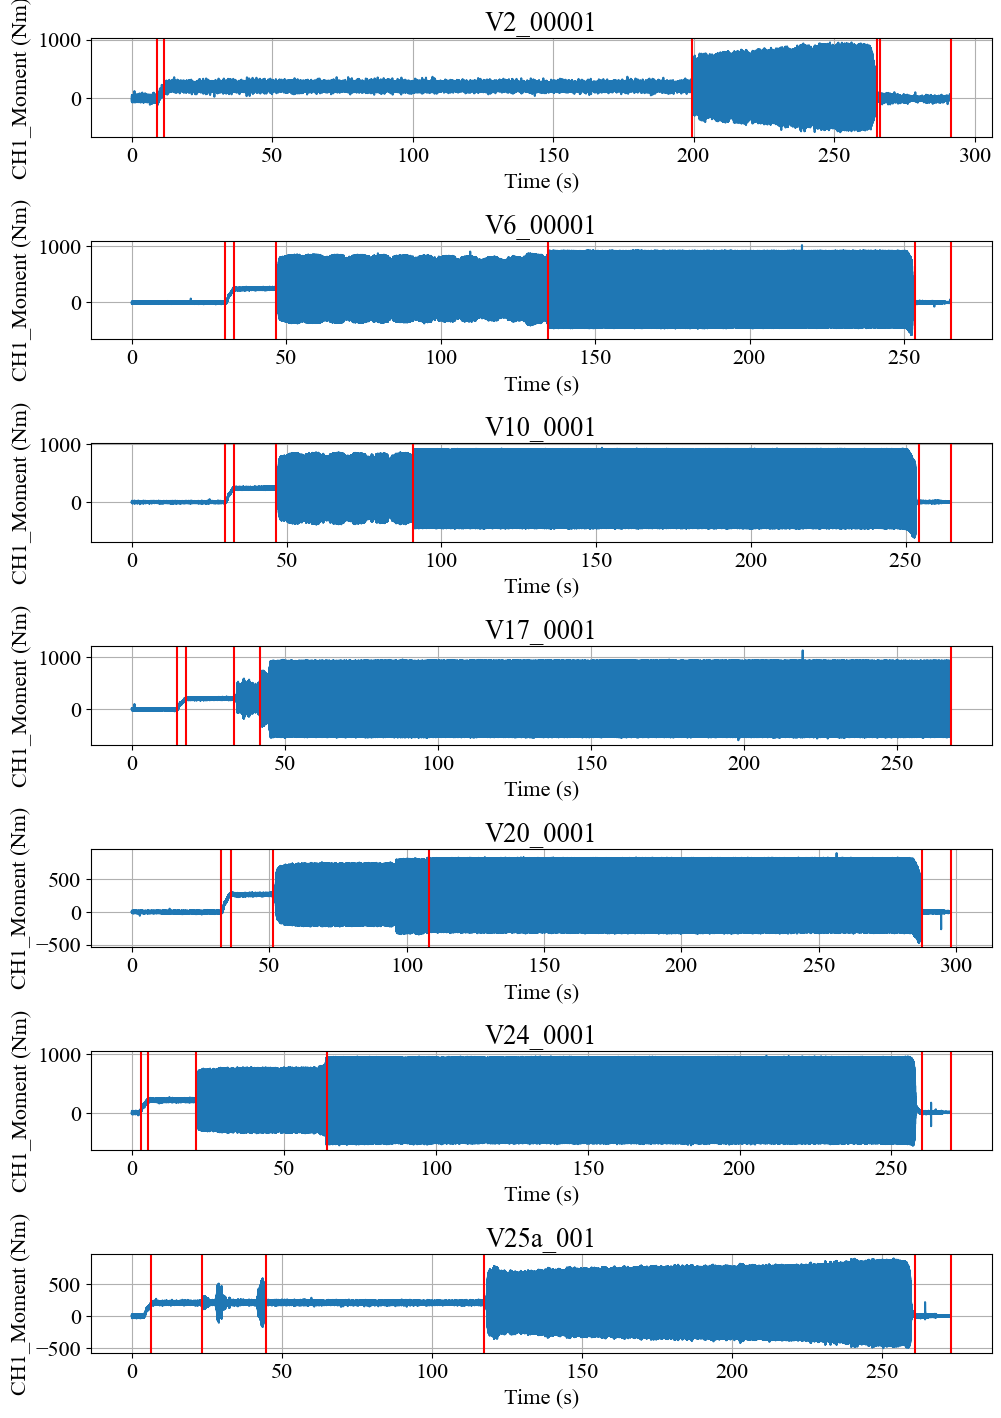

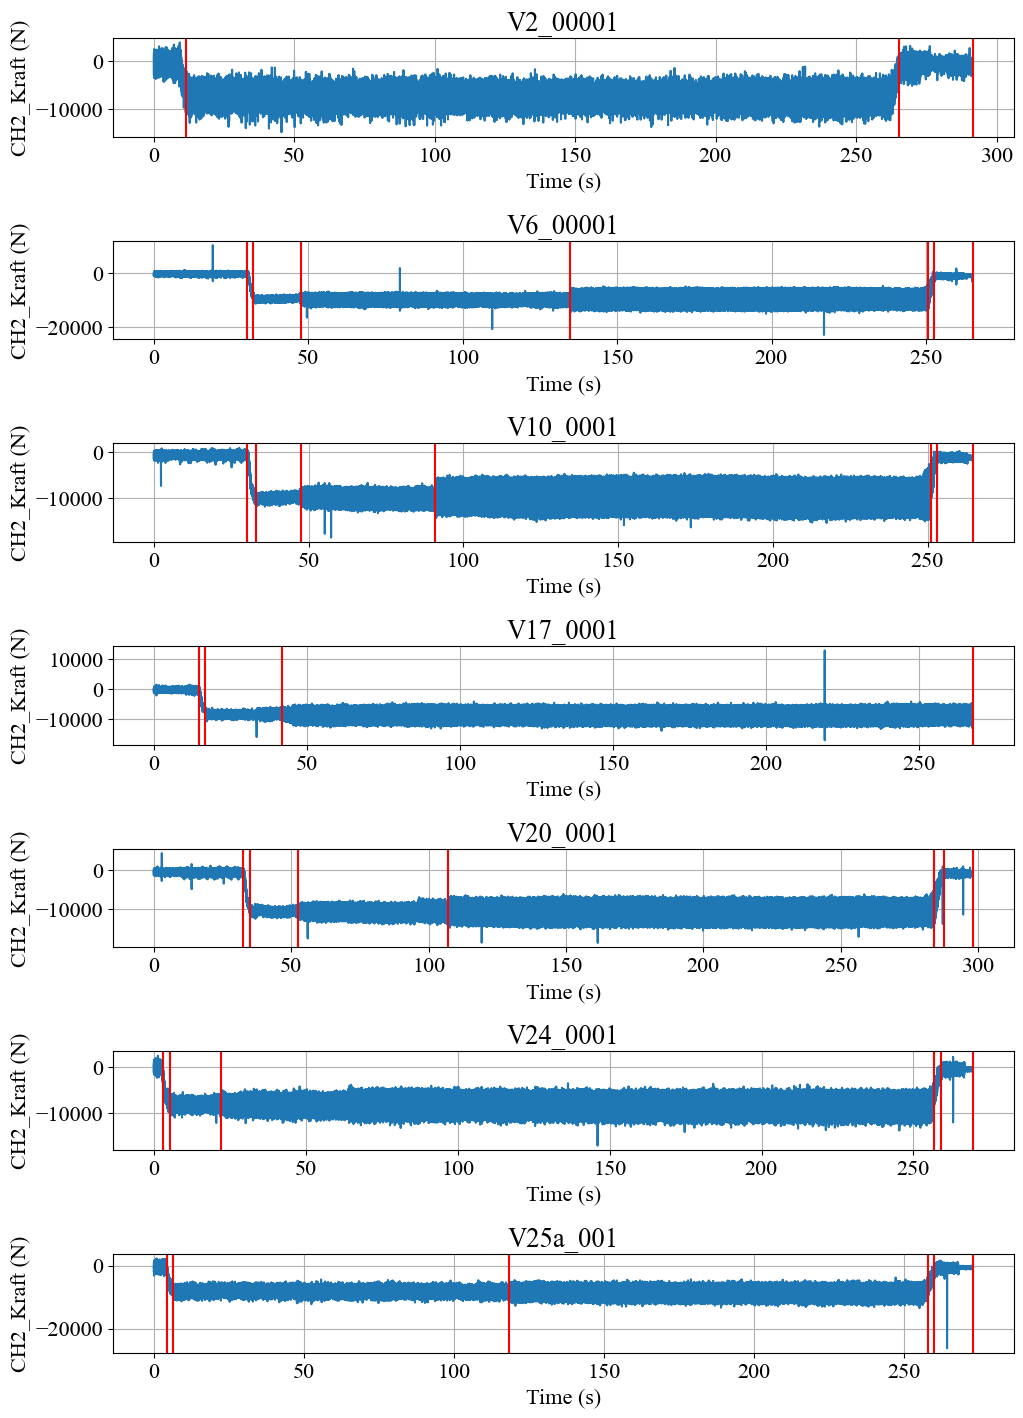

In [6]:
datasets = [
            'V2_00001',
            'V6_00001',
            'V10_0001',
            'V17_0001',
            'V20_0001',
            'V24_0001',
            'V25a_001'
        ]
plot_change_points_mult(datasets, data, changepoints, "CH1_Moment", (10, 14), "V_datasets_CH1_cpt.pdf")
plot_change_points_mult(datasets, data, changepoints, "CH2_Kraft", (10, 14), "V_datasets_CH2_cpt.pdf")